In [1]:
!pip install SciencePlots

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import scipy

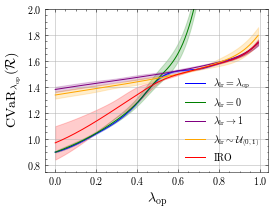

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
# Data from the table
lambdas = np.array([0.0, 0.1,0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 0.99])
import numpy as np
import scienceplots
import matplotlib as mpl
plt.style.use(['science','no-latex'])
# Organizing the provided data for each category into a structured format

# Organizing the provided data for each category into a structured format

precise_data = {
   "GT": {
        "mean": np.array([0.8991, 0.9576, 1.04, 1.1356,1.2763, 1.4532, 1.5363, 1.5798, 1.6333, 1.7403]),
        "std": np.array([0.000784345811122722, 0.00063092600757835, 0.0013082258532972504, 0.0025478081343590425,
                         0.001504729364493038, 0.0013143527864141915, 0.002022444400985063, 0.0010776020330300663,
                         0.0041603038209401646, 0.021988017070494116])
    },
    #"Median": {
    #    "mean": np.array([1.0835, 1.1981, 1.3466, 1.5374, 1.7916, 2.1475, 3.57, 5.3468, 5.9477, 6.3915]),
    #    "std": np.array([0.013786015699471493, 0.015269426735707785, 0.0517195542562129296, 0.0822983654919835676,
    #                     0.19672944034945187, 0.2762422340734978, 0.4614077816079419, 0.6927418410571463,
    #                     0.7831316914093008, 0.8401799423037523])
    #},
    "Uniform": {
        "mean": np.array([1.3372, 1.3623, 1.3869, 1.4115, 1.438, 1.4661, 1.5376, 1.5878, 1.6601, 1.7948]),
        "std": np.array([0.027806824656774795, 0.02642598859583695, 0.024480699353599457, 0.018167259866189046,
                         0.02177916091156457, 0.013019080703216916, 0.007534559288809371, 0.028014396650638793,
                         0.04854746014359689, 0.06199954927437302])
    },
    "Avg": {
        "mean": np.array([0.8988, 0.9636, 1.0447, 1.1461, 1.2783, 1.4601, 2.1651, 3.0237, 3.3513, 3.6282]),
        "std": np.array([0.004377119715116398, 9.001513218678728e-03, 8.038263501313438e-03, 0.0194394822325554252,
                         0.0311491051083203802, 0.05109070879437001018, 0.08128367246156411566, 0.0915299679645597291,
                         0.1015794782489660564, 0.109113114719558278])
    },
    "Worst": {
        "mean": np.array([1.3798, 1.404, 1.4269, 1.4489, 1.472, 1.4958, 1.5535, 1.5895, 1.6396, 1.7347]),
        "std": np.array([0.020555205204452334, 0.019660489711726997, 0.018463915272893688, 0.01542015590978162,
                         0.017112011734273583, 0.01380004050737212, 0.010283970769681296, 0.006941964221718019,
                         0.0051016308770664934, 0.018031750287653064])
    },
    "IRO":{
    "mean": np.array([0.9704, 1.0456, 1.1363, 1.2366, 1.3397, 1.4352, 1.5368, 1.5786, 1.6319, 1.7421]),
    "std": np.array([0.12813684895547792, 0.11029610407552813, 0.0871513849466196, 0.06845165114247202, 
                     0.05827963556802068, 0.00881032968391223, 0.0026464087586982985, 0.0017994254545338664, 
                     0.005297690965773182, 0.021476780119746134])
    }
}

custom_legend_names = {
    "GT": r'$\lambda_{\mathrm{lr}}=\lambda_{\mathrm{op}}$',
    "Reg": r'Two-stage Reg.',
    "Beta(0.1,0.2)": r'Beta(0.1,0.2)',
    "Chebyshev": "Chebyshev",
    #"Median": "Median",
    "Avg": r'$\lambda_{\mathrm{lr}}=0$',
    "Worst": r'$\lambda_{\mathrm{lr}}\rightarrow 1$',
    "Uniform": r'$\lambda_{\mathrm{lr}}\sim \mathcal{U}_{(0,1)}$',
    "IRO": 'IRO'
}

# Different color for each learner
colors = {
    "GT": "blue", #"Median": "brown", 
    "Avg": "green", "Worst": "purple", 
    "Uniform": "orange", "IRO": "red"
}

plt.figure(figsize=(4, 3))
for learner, color in colors.items():
    xnew = np.linspace(lambdas.min(), lambdas.max(), 300)  

    # Smooth the mean
    mean_spline = make_interp_spline(lambdas, precise_data[learner]["mean"], k=3)
    mean_smooth = mean_spline(xnew)
    plt.plot(xnew, mean_smooth, label=custom_legend_names[learner], color=color)

    # Smooth the standard deviation
    std_spline_up = make_interp_spline(lambdas, precise_data[learner]["mean"]+precise_data[learner]["std"], k=3)
    std_spline_dow = make_interp_spline(lambdas, precise_data[learner]["mean"]-precise_data[learner]["std"], k=3)
    std_smooth_up, std_smooth_dow = std_spline_up(xnew), std_spline_dow(xnew)
    plt.fill_between(xnew, 
                     std_smooth_up, 
                     std_smooth_dow, 
                     color=color, alpha=0.2)
# Limit y-axis to exclude outlier values
plt.ylim(0.75, 2)  # Set y-axis limit

# Labels and title
plt.xlabel(r'$\lambda_{\mathrm{op}}$', fontsize=14)
plt.ylabel(r'$\mathrm{CVaR}_{\lambda_{\mathrm{op}}}(\mathbf{\mathcal{R}})$',fontsize=14)
#plt.title(r'Precise vs Imprecise Learners',fontsize=16)
plt.legend(fontsize=10)
plt.grid(True)
plt.savefig('precisevsimprecise.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

In [6]:
new_data={'GT': {'mean': [1.0591065287590027,
   1.0817204117774963,
   1.0934793949127197,
   1.1356237530708313,
   1.1372671723365784,
   1.1589208245277405,
   1.1710697412490845,
   1.1713797450065613,
   1.1760536432266235,
   1.1780880093574524,
   1.1832715272903442,
   1.1855892539024353],
  'std': [0.003726065158843994,
   0.00905531644821167,
   0.016474485397338867,
   0.05078454971313477,
   0.05882396459579468,
   0.05750449657440186,
   0.05476158857345581,
   0.07334683418273926,
   0.0810123032331466675,
   0.07594031095504761,
   0.01674598455429077,
   0.039810001850128174]},
 'Beta_2_2': {'mean': [1.186237096786499,
   1.2251809239387512,
   1.2867665886878967,
   1.3619464039802551,
   1.4420557618141174,
   1.5268827080726624,
   1.6159223914146423,
   1.7079659700393677,
   1.802602767944336,
   1.8470221161842346,
   1.8933007717132568,
   1.9497938752174377],
  'std': [0.15134304761886597,
   0.16382145881652832,
   0.14729517698287964,
   0.1299370527267456,
   0.10491406917572021,
   0.08224040269851685,
   0.06202322244644165,
   0.04316955804824829,
   0.02580159902572632,
   0.009910523891448975,
   0.012405812740325928,
   0.0343395471572876]},
 'Beta_05_05': {'mean': [1.2891512513160706,
   1.2974623441696167,
   1.3006091117858887,
   1.3032448887825012,
   1.3075915575027466,
   1.310637652873993,
   1.3147760033607483,
   1.3245035409927368,
   1.3257333636283875,
   1.3353015780448914,
   1.3419610261917114,
   1.3513681888580322],
  'std': [0.1605852246284485,
   0.11300766468048096,
   0.08974957466125488,
   0.06624633073806763,
   0.024447202682495117,
   0.008491575717926025,
   0.027228474617004395,
   0.013912558555603027,
   0.022621452808380127,
   0.04776638746261597,
   0.0806734561920166,
   0.11594516038894653]},
 'Beta_5_1': {'mean': [1.3165927529335022,
   1.340410590171814,
   1.3533315658569336,
   1.3661552667617798,
   1.3921594023704529,
   1.411309838294983,
   1.4165682196617126,
   1.4176083207130432,
   1.4182682633399963,
   1.4207531809806824,
   1.4283196926116943,
   1.4416601061820984],
  'std': [0.10853546857833862,
   0.11048269271850586,
   0.11258995532989502,
   0.11469769477844238,
   0.11904686689376831,
   0.12341421842575073,
   0.11135697364807129,
   0.0776779055595398,
   0.013765215873718262,
   0.025778628587722778,
   0.0412350481748580933,
   0.0318576031923294067]},
 'Beta_1_1': {'mean': [1.1636455655097961,
   1.1898906826972961,
   1.2343655228614807,
   1.283702313899994,
   1.322339951992035,
   1.3575704097747803,
   1.3850280046463013,
   1.3993418216705322,
   1.4060558080673218,
   1.4093891382217407,
   1.4099034667015076,
   1.4125919342041016],
  'std': [0.02962172031402588,
   0.007178664207458496,
   0.003974318504333496,
   0.01516115665435791,
   0.028212249279022217,
   0.0192030668258667,
   0.007347464561462402,
   0.013000190258026123,
   0.03758782148361206,
   0.07411044836044312,
   0.10815495252609253,
   0.13798946142196655]}}

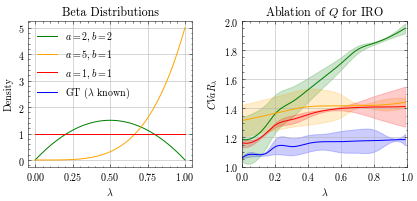

In [7]:
from scipy.stats import beta
from scipy.interpolate import make_interp_spline
# Different color for each learner
custom_legend_names = {
    "GT": "GT ($\lambda$ known)",
    "Beta_2_2":"$a=2,b=2$",
    #"Beta_05_05":"$a=0.5,b=0.5$", 
    "Beta_5_1":"$a=5,b=1$", 
    "Beta_1_1":"$a=1,b=1$"
}

colors = {
    "GT": "blue", 
    "Beta_2_2": "green",
    #"Beta_05_05": "purple", 
    "Beta_5_1": "orange", 
    "Beta_1_1": "red"
}
beta_params = {
    "Beta_2_2": (2, 2),
    #"Beta_05_05": (0.5, 0.5),
    "Beta_5_1": (5, 1),
    "Beta_1_1": (1, 1)
}
lambdas = np.array([0.0, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

# Plotting Beta distributions on the left plot
for learner, (a, b) in beta_params.items():
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, a, b)
    ax1.plot(x, y, color=colors[learner], label=custom_legend_names[learner])
ax1.plot([], [], color=colors["GT"], label=custom_legend_names["GT"])
ax1.set_title('Beta Distributions')
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('Density')
ax1.grid(True)
ax1.legend()
# Plotting data on the right plot
for learner, color in colors.items():
    if learner in new_data:
        xnew = np.linspace(lambdas.min(), lambdas.max(), 300) 
        mean_spline = make_interp_spline(lambdas, new_data[learner]["mean"], k=3)
        mean_smooth = mean_spline(xnew)
        ax2.plot(xnew, mean_smooth, color=color, label=custom_legend_names[learner])

        std_spline_up = make_interp_spline(lambdas, np.array(new_data[learner]["mean"]) + np.array(new_data[learner]["std"]), k=3)
        std_spline_down = make_interp_spline(lambdas, np.array(new_data[learner]["mean"]) - np.array(new_data[learner]["std"]), k=3)
        std_smooth_up, std_smooth_down = std_spline_up(xnew), std_spline_down(xnew)
        ax2.fill_between(xnew, std_smooth_up, std_smooth_down, color=color, alpha=0.2)

ax2.set_ylim(1, 2.0)
ax2.set_xlim(0, 1)
ax2.set_title('Ablation of $Q$ for IRO')
ax2.set_xlabel('$\lambda$')
ax2.set_ylabel('$CVaR_\lambda$')
ax2.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
fig.savefig('beta_ablation.pdf', format='pdf', bbox_inches='tight')

In [8]:
data={'GT': {'mean': [1.4103769, 1.4378386, 1.4484534, 1.4586779, 1.4800152, 1.4980229, 1.5221974, 1.5438681, 1.5663155, 1.6093086, 1.6739283, 1.8450341], 'std': [6.0333365e-05, 0.00012868515, 0.00018246943, 0.00042534684, 0.00085180457, 0.0016566262, 0.002020032, 0.0022243669, 0.0027971738, 0.007835178, 0.008798127, 0.0128215095]}, 'Beta_5_5': {'mean': [1.4417597, 1.4743761, 1.486887, 1.495078, 1.5046092, 1.5074819, 1.5192446, 1.5618466, 1.6369547, 1.7336115, 1.85967, 2.1456826], 'std': [0.00044594632, 0.0028780566, 0.017411288, 0.026133804, 0.027231425, 0.028156495, 0.028331075, 0.032065053, 0.08560206, 0.14141159, 0.19780178, 0.2707712]}, 'Beta_5_1': {'mean': [1.4737219, 1.5153322, 1.534801, 1.5509204, 1.5830007, 1.6110921, 1.6256819, 1.6281333, 1.6294426, 1.6304718, 1.6788349, 1.8774508], 'std': [0.0081347525, 0.017142529, 0.03521558, 0.041293867, 0.07650264, 0.0831416, 0.093704976, 0.100034826, 0.10533488, 0.11383576, 0.11602009, 0.12252662]}, 'Beta_1_1': {'mean': [1.442861, 1.4856548, 1.5047183, 1.5204307, 1.5491524, 1.5700105, 1.5787927, 1.5799574, 1.582384, 1.6048793, 1.6787823, 1.8650837], 'std': [0.005295536, 0.01958909, 0.019676127, 0.023133665, 0.03206539, 0.032934804, 0.036861952, 0.040994436, 0.044662636, 0.047006253, 0.047482148, 0.049786516]}, 'Pareto': {'mean': [1.4106197, 1.4394284, 1.4521184, 1.4630718, 1.4853634, 1.5090071, 1.535571, 1.568193, 1.6082636, 1.6570764, 1.7352015, 1.911233], 'std': [0.0010310645, 0.0022481913, 0.0027717235, 0.0032523444, 0.005009367, 0.008459824, 0.014195537, 0.022098856, 0.031118833, 0.037093427, 0.040427327, 0.051565323]}}

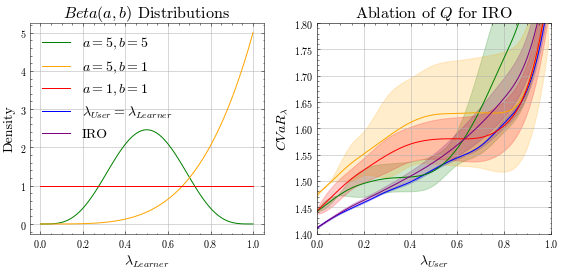

In [27]:
# Different color for each learner
import scienceplots
plt.style.use(['science','no-latex'])
from scipy.interpolate import make_interp_spline
true_alphas = [0.0, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
custom_legend_names = {
    "GT": "$\lambda_{\mathrm{op}}=\lambda_{\mathrm{\op}}$",
    "Beta_5_5":"$Beta(5,5)$",
    "Beta_5_1":"$a=5,b=1$",
    "Beta_1_1":"$a=1,b=1$",
    "Pareto": "IRO"
}

colors = {
    "GT": "blue", 
    "Beta_5_5": "green",
    "Beta_5_1": "orange", 
    "Beta_1_1": "red",
    "Pareto": "Purple"
}
lambdas = np.array(true_alphas)
beta_params = {
    "Beta_5_5": (5, 5),
    "Beta_5_1": (5, 1),
    "Beta_1_1": (1, 1)
}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plotting Beta distributions on the left plot
for learner, (a, b) in beta_params.items():
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, a, b)
    ax1.plot(x, y, color=colors[learner], label=custom_legend_names[learner])
ax1.plot([], [], color=colors["GT"], label=custom_legend_names["GT"])
ax1.plot([], [], color=colors["Pareto"], label=custom_legend_names["Pareto"])
ax1.set_title('$Beta(a,b)$ Distributions',fontsize=16)
ax1.set_xlabel('$\lambda_{Learner}$',fontsize=14)
ax1.set_ylabel('Density',fontsize=14)
ax1.grid(True)
ax1.legend(fontsize=14)
# Plotting data on the right plot
for learner, color in colors.items():
    if learner in data:
        xnew = np.linspace(lambdas.min(), lambdas.max(), 300) 
        mean_spline = make_interp_spline(lambdas, data[learner]["mean"], k=3)
        mean_smooth = mean_spline(xnew)
        ax2.plot(xnew, mean_smooth, color=color, label=custom_legend_names[learner])

        std_spline_up = make_interp_spline(lambdas, np.array(data[learner]["mean"]) + np.array(data[learner]["std"]), k=3)
        std_spline_down = make_interp_spline(lambdas, np.array(data[learner]["mean"]) - np.array(data[learner]["std"]), k=3)
        std_smooth_up, std_smooth_down = std_spline_up(xnew), std_spline_down(xnew)
        ax2.fill_between(xnew, std_smooth_up, std_smooth_down, color=color, alpha=0.2)
ax2.set_ylim(1.4, 1.8)
ax2.set_xlim(0, 1)
ax2.set_title('Ablation of $Q$ for IRO',fontsize=16)
ax2.set_xlabel('$\lambda_{User}$',fontsize=14)
ax2.set_ylabel('$CVaR_\lambda$',fontsize=14)
ax2.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
GT
0.5725 0.03200257
0.6699 0.027458131
0.9295 0.041738987
1.3148 0.15958333
1.6947 0.3874166
2.4048 0.8391342
2.7708 1.0671673
Avg Case
0.5725 0.03200257
0.6843 0.031124562
0.8903 0.005520463
1.2487 0.07032001
1.6931 0.029376507
2.3233 0.05851972
2.6223 0.065200806
Worse Case
1.2599 0.032405317
1.3335 0.00030839443
1.3631 0.08539724
1.553 0.18032831
1.9525 0.38754416
2.5459 0.82188773
2.7708 1.0671673
Inf
1.1068 0.0002052784
1.1631 0.024214447
1.2329 0.027865112
1.4752 0.035026014
1.758 0.08205736
2.1582 0.3559767
2.3243 0.5286236
Pareto
0.8671 0.16920307
0.9251 0.15798211
0.8749 0.07294881
0.8811 0.015715092
0.9434 0.09098765
1.2571 0.30997217
1.4825 0.42216492